# Louvain method for community detection

One aproach for grouping the genes was through the community structure of the network, it was estimated using the [Louvain method](https://arxiv.org/abs/0803.0476). The Louvain method is a greedy optimization method that optimizes the modularity of a partition of the network.

The libraries used were [NetworkX](https://networkx.org/) and a [module](https://python-louvain.readthedocs.io/en/latest/) for community detection.

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import community as community_louvain
import matplotlib.cm as cm

This program recieves as an input the name of the file of the network that we want to analyze.

In [2]:
namenet="Net_InterestFT_S"

In [3]:
df = pd.read_csv(namenet+".txt", sep='\t')

In [4]:
G = nx.from_pandas_edgelist(df,source="Regulator",target="Target")

Compute the best partition of the network

In [5]:
partition = community_louvain.best_partition(G)
partition = community_louvain.best_partition(G)
community_partition = pd.DataFrame(partition.items())
community_partition.columns = ['genes', 'com']

### The output file has this format:

In [6]:
community_partition.head()

,genes,com
0,Solyc06g063070.2,0
1,Solyc08g028780.1,0
2,Solyc08g080290.2,1
3,Solyc04g015700.1,1
4,Solyc03g113560.2,1


Where the column "genes" has the name of the gene, and the column "com" has the number of the community where the gene belongs.

Then the file is saved.

In [7]:
community_partition.to_csv("Community genes "+namenet+".csv",index=False)

Compute the best spatial position in order to display the network.  

In [8]:
pos = nx.spring_layout(G)

#### Plot of the network

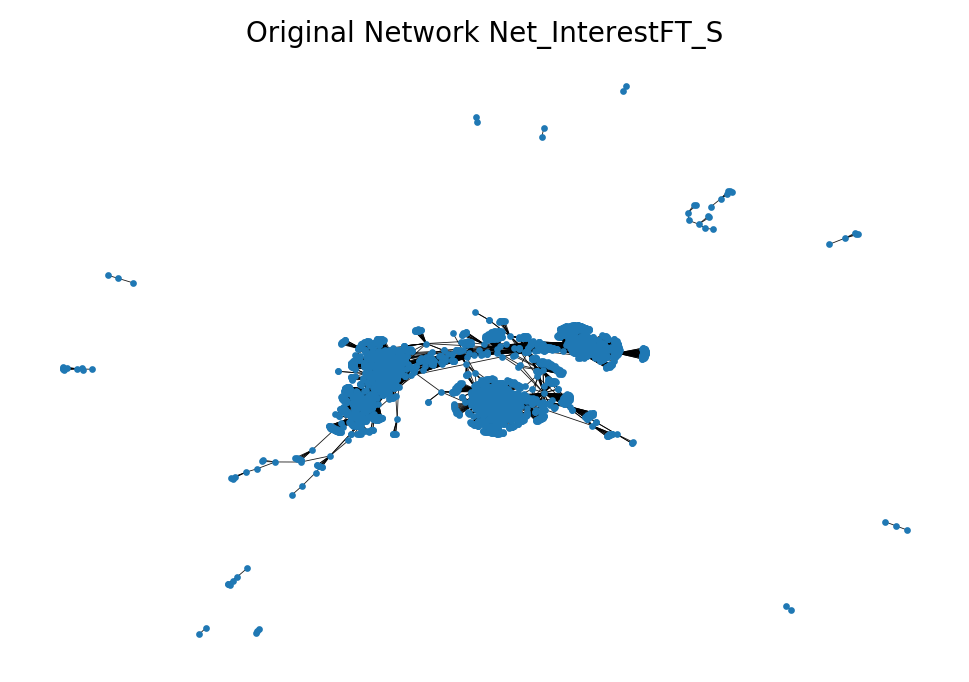

In [9]:
plt.rcParams['figure.figsize'] = [6, 4]
plt.rcParams['figure.dpi'] = 200 
fig, ax = plt.subplots()
ax.axis("off")
nx.draw_networkx_nodes(G, pos,node_size=2)
nx.draw_networkx_edges(G, pos, alpha=0.9,width=0.3,connectionstyle="arc3,rad=-0.3")
plt.title("Original Network "+namenet, fontsize=10)
plt.show()

#### Plot of the network with the nodes colored according to their partition

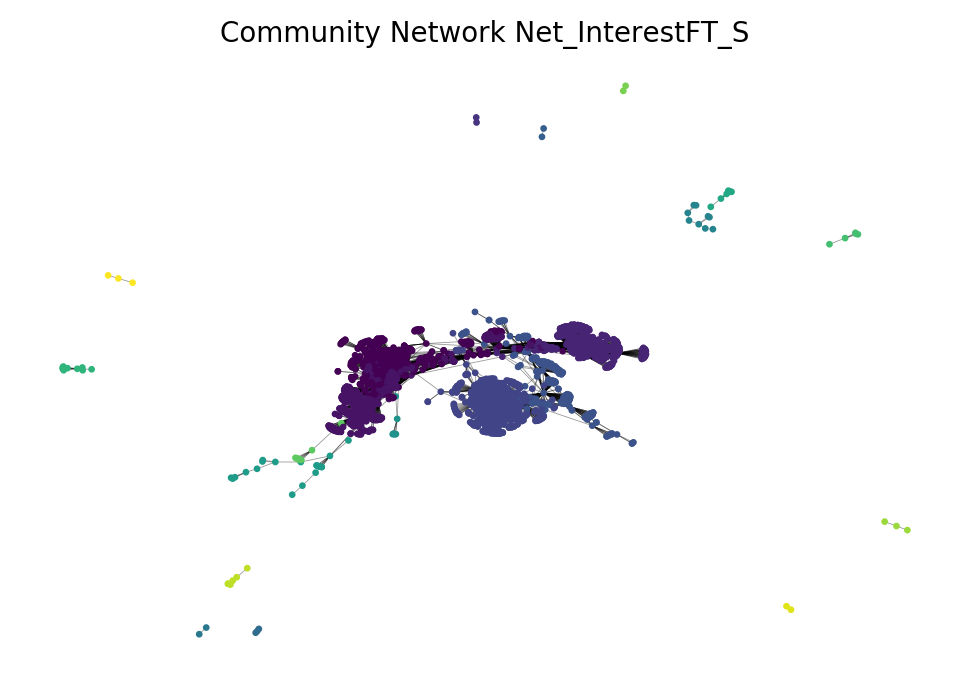

In [10]:
plt.rcParams['figure.figsize'] = [6, 4]
plt.rcParams['figure.dpi'] = 200 
fig, ax = plt.subplots()
ax.axis("off")
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(),
                       cmap=cmap,node_size=2, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos,connectionstyle='arc3,rad=-0.3', alpha=0.4,width=0.3)

plt.title("Community Network "+namenet, fontsize=10)
plt.show()